# 我的复现

In [1]:
import numpy as np
import torch
import torchvision
from torch.autograd import Variable
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as Fun
import cv2

In [2]:
train_dataset = datasets.MNIST(root='data/', train=True,
                               transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='data/', train=False,
                              transform=transforms.ToTensor(), download=True)
# transform把输入转为tensor

In [3]:
#　读取数据
train_loader = DataLoader(dataset = train_dataset, batch_size = 100, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size= 100, shuffle = True)
# 这里迭代的images: 100*1*28*28 的一个Tensor labels: 长度为100的Tensor

next()返回迭代器的下一个项目  
next(iterable[, default])  
iterable: 可迭代对象  
default: 没有下一个元素返回的默认值  
> 常常和iter()函数一起使用   

**iter()从可迭代的对象获取迭代器**:  
实际调用了可迭代对象的iter方法


In [4]:
# 使用举例
a = list(range(5))
iter_a = iter(a)  # 获取为迭代器
for i in range(5):
    print(next(iter_a))

0
1
2
3
4


In [5]:
images, labels = next(iter(train_loader))
img = torchvision.utils.make_grid(images, nrow = 10)
img = img.numpy().transpose(1, 2, 0)
cv2.imshow('img', img)
cv2.waitKey(0)

-1

输入层  
隐藏层(可能有多层)  
输出层

In [6]:
lr = 0.01
epochs = 50
n_feature = 28*28  # 输入是28*28的图片
n_hidden = 100  # 隐藏层
n_output = 10  # 输出0-9的概率

In [21]:
class BPModel(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output) -> None:
        super().__init__()
        # 一层隐藏层  784*100
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)  # 输出层
        
    def forward(self, x: torch.Tensor):
        x = x.view(x.shape[0], -1)  # 相当于np的resize in:64*784
        x = Fun.relu(self.hidden(x))  # 隐藏层使用激活函数
        out = Fun.softmax(self.out(x), dim=1)
        return out

# 定义优化器和损失函数
net = BPModel(n_feature=n_feature, n_hidden=n_hidden, n_output=n_output)
optimizer = torch.optim.Adam(net.parameters(), lr=lr)  # 构造优化器
loss_fun = torch.nn.CrossEntropyLoss()  # 这里的损失函数没有除数据长度 是一个总的损失

# 存储训练情况
loss_steps = np.zeros(epochs)
accuracy_steps = np.zeros(epochs)

In [27]:
# 训练
import time
t1 = time.perf_counter()
for epoch in range(epochs):
    total_train_loss = 0
    test_accuracy = 0
    for images, labels in train_loader:
        out = net(images)
        loss = loss_fun(out, labels)  # return Tensor: float
        total_train_loss += loss  # 累计损失
        # 一套流程
        optimizer.zero_grad()  # 不清空就会累加计算梯度
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重
        
        
        # 计算准确率
        with torch.no_grad():
            for images, labels in test_loader:
                test_out = net(images)
                test_loss = loss_fun(test_out, labels)
                test_accuracy += test_loss
                
    loss_steps[epoch] = total_train_loss            
    accuracy_steps[epoch] = test_accuracy
    print(f'Epoch {epoch}: E(Loss) = {total_train_loss/len(train_loader)}')
    print(f'Epoch {epoch}: E(Test Loss) = {test_loss/len(test_loader)}')

t2 = time.perf_counter()
print(f'cost time = {t2-t1: .4f}')             

KeyboardInterrupt: 

# 参考代码

In [ ]:
# 超参数设置
lr = 0.02  # 学习率
epochs = 300  # 训练轮数
n_feature = 4    # 输入特征(鸢尾花四个特征)
n_hidden = 20   # 隐含层
n_output = 3    # 输出(鸢尾花三种类别)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  # 训练集，测试集划分函数
import torch
import torch.nn.functional as Fun


d:\ANACONDA\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


第0次训练，loss=1.1117253303527832
测试鸢尾花的预测准确率 0.46666666865348816
第1次训练，loss=1.1053028106689453
测试鸢尾花的预测准确率 0.46666666865348816
第2次训练，loss=1.09953773021698
测试鸢尾花的预测准确率 0.46666666865348816
第3次训练，loss=1.094413161277771
测试鸢尾花的预测准确率 0.5
第4次训练，loss=1.089361548423767
测试鸢尾花的预测准确率 0.699999988079071
第5次训练，loss=1.0836470127105713
测试鸢尾花的预测准确率 0.6333333253860474
第6次训练，loss=1.0769461393356323
测试鸢尾花的预测准确率 0.5666666626930237
第7次训练，loss=1.0690652132034302
测试鸢尾花的预测准确率 0.5
第8次训练，loss=1.0599077939987183
测试鸢尾花的预测准确率 0.5333333611488342
第9次训练，loss=1.0494729280471802
测试鸢尾花的预测准确率 0.5666666626930237
第10次训练，loss=1.0379347801208496
测试鸢尾花的预测准确率 0.5666666626930237
第11次训练，loss=1.0258387327194214
测试鸢尾花的预测准确率 0.6333333253860474
第12次训练，loss=1.0129579305648804
测试鸢尾花的预测准确率 0.6666666865348816
第13次训练，loss=0.9991685748100281
测试鸢尾花的预测准确率 0.6666666865348816
第14次训练，loss=0.9844884872436523
测试鸢尾花的预测准确率 0.6666666865348816
第15次训练，loss=0.9690675735473633
测试鸢尾花的预测准确率 0.6666666865348816
第16次训练，loss=0.9531775712966919
测试鸢尾花的预测准确率 0.66666

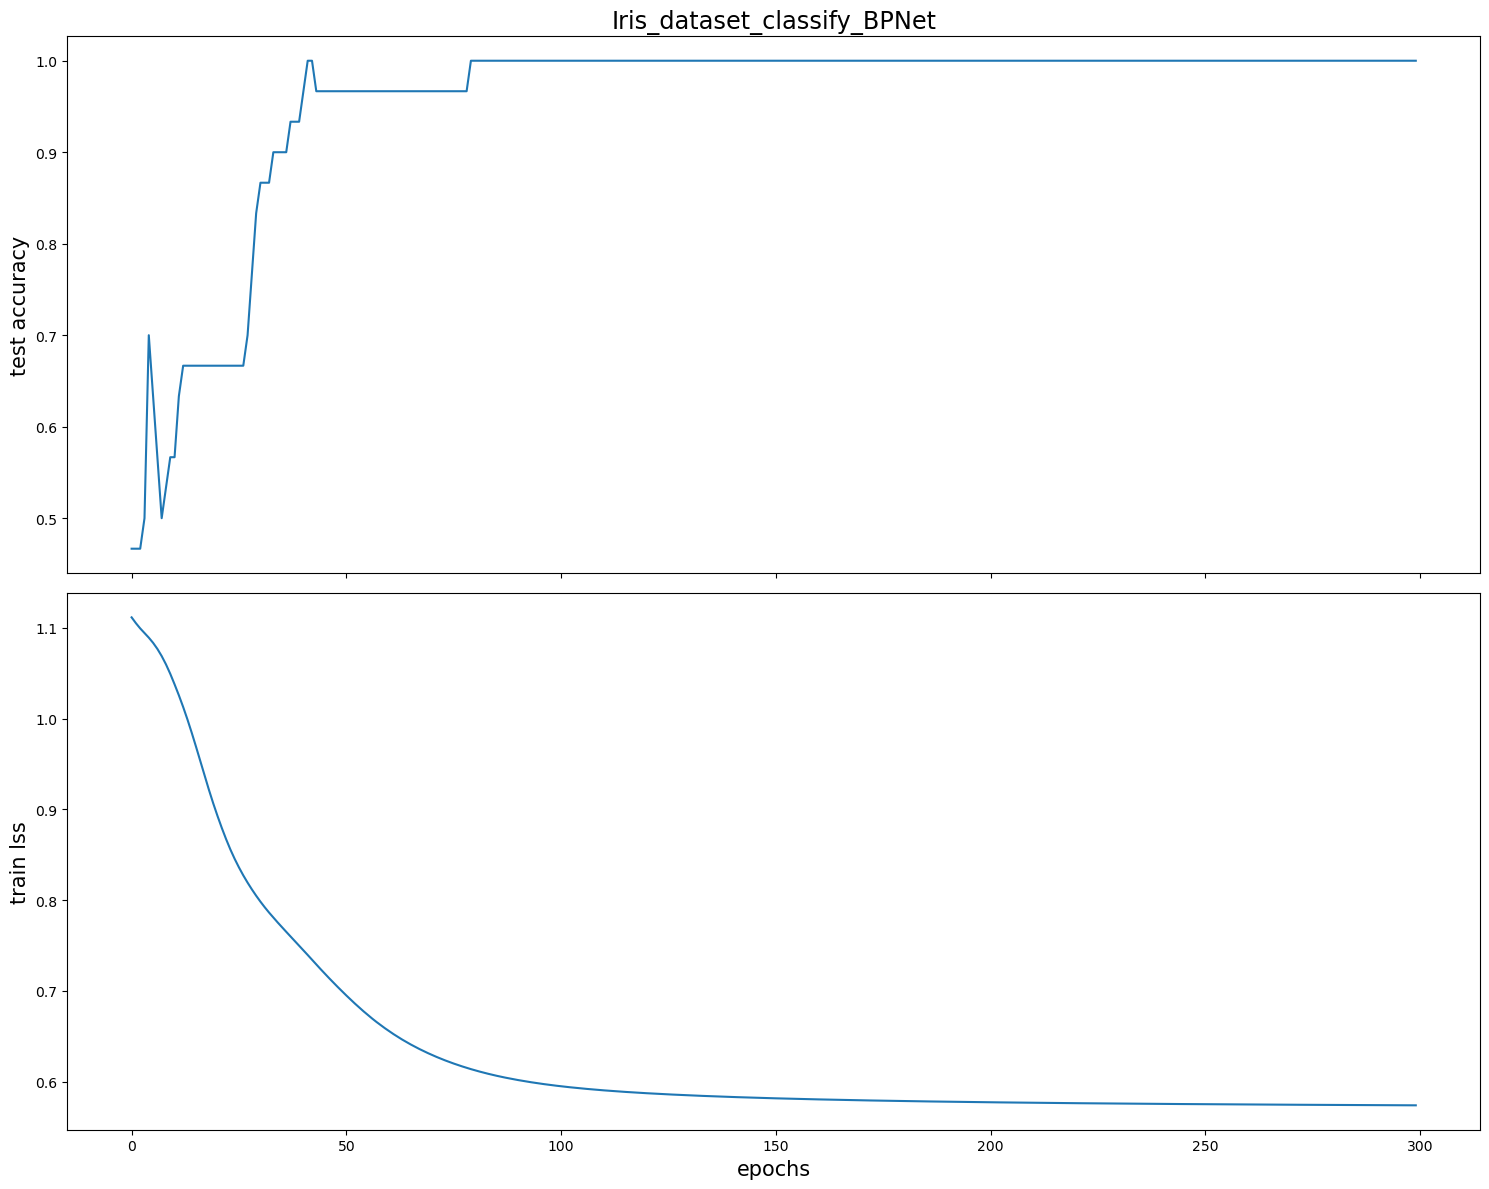

In [ ]:
#1.准备数据
iris=datasets.load_iris() #下载数据集
 
#设置训练集数据80%，测试集20%
x_train0,x_test0,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=22)
#归一化(也就是所说的min-max标准化)通过调用sklearn库的标准化函数
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train0)
x_test = min_max_scaler.fit_transform(x_test0)
 
#将数据类型转换为tensor方便pytorch使用
x_train=torch.FloatTensor(x_train)
y_train=torch.LongTensor(y_train)
x_test=torch.FloatTensor(x_test)
y_test=torch.LongTensor(y_test)
 
#2.定义BP神经网络
class BPNetModel(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(BPNetModel, self).__init__()
        self.hiddden=torch.nn.Linear(n_feature,n_hidden)#定义隐层网络
        self.out=torch.nn.Linear(n_hidden,n_output)#定义输出层网络
        
    def forward(self,x):
        x=Fun.relu(self.hiddden(x)) #隐层激活函数采用relu()函数
        out=Fun.softmax(self.out(x),dim=1) #输出层采用softmax函数
        return out
    
#3.定义优化器和损失函数
net=BPNetModel(n_feature=n_feature,n_hidden=n_hidden,n_output=n_output) #调用网络
optimizer=torch.optim.Adam(net.parameters(),lr=lr) #使用Adam优化器，并设置学习率
loss_fun=torch.nn.CrossEntropyLoss() #对于多分类一般使用交叉熵损失函数
 
#4.训练数据
loss_steps=np.zeros(epochs) #构造一个array([ 0., 0., 0., 0., 0.])里面有epochs个0
accuracy_steps=np.zeros(epochs)
 
for epoch in range(epochs):
    y_pred=net(x_train) #前向传播
    loss=loss_fun(y_pred,y_train)#预测值和真实值对比
    optimizer.zero_grad() #梯度清零
    loss.backward() #反向传播
    optimizer.step() #更新梯度
    loss_steps[epoch]=loss.item()#保存loss
    running_loss = loss.item()
    print(f"第{epoch}次训练，loss={running_loss}".format(epoch,running_loss))
    with torch.no_grad(): #下面是没有梯度的计算,主要是测试集使用，不需要再计算梯度了
        y_pred=net(x_test)
        correct=(torch.argmax(y_pred,dim=1)==y_test).type(torch.FloatTensor)
        accuracy_steps[epoch]=correct.mean()
        print("测试鸢尾花的预测准确率", accuracy_steps[epoch])
 
#print("测试鸢尾花的预测准确率",accuracy_steps[-1])
 
#5.绘制损失函数和精度
fig_name="Iris_dataset_classify_BPNet"
fontsize=15
fig,(ax1,ax2)=plt.subplots(2,figsize=(15,12),sharex=True)
ax1.plot(accuracy_steps)
ax1.set_ylabel("test accuracy",fontsize=fontsize)
ax1.set_title(fig_name,fontsize="xx-large")
ax2.plot(loss_steps)
ax2.set_ylabel("train lss",fontsize=fontsize)
ax2.set_xlabel("epochs",fontsize=fontsize)
plt.tight_layout()
plt.savefig(fig_name+'.png')
plt.show()
 